<a href="https://colab.research.google.com/github/JuanGallo132/sprint8-final-proyecto-7-explorando-drivers-de-comportamiento-en-NovaRetail/blob/main/S8_Student_Version_Project_NovaRetail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 7 - Explorando factores de comportamiento en NovaRetail+


NovaRetail+ es una plataforma de comercio electrónico en Latinoamérica con millones de usuarios.

Para el cierre de 2024, el equipo de **Crecimiento y retención** tiene como objetivo responder:

**¿Qué factores del comportamiento del cliente están más fuertemente asociados con el ingreso anual generado?**

> Este proyecto es un análisis **correlacional** (exploratorio).  
> **Correlación ≠ causalidad.**

## Sección 1 - Cargar y explorar el dataset

En esta sección validamos:
- que el dataset cargue correctamente
- tipos de datos
- valores faltantes / rangos generales

Antes de correlacionar, primero entendemos el “terreno”.

In [ ]:
# Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import FileLink
from scipy.stats import pointbiserialr
from scipy.stats import chi2_contingency

### Cargar Dataset

In [ ]:
# Cargar el dataset y explorar datos
df = pd.read_csv('/datasets/novaretail_comportamiento_clientes_2024.csv')

In [ ]:
# Descarga del archivo CSV
# Primero lo guardamos en el entorno local de la sesión
file_name = 'novaretail_comportamiento_clientes_2024.csv'
df.to_csv(file_name, index=False)

# Generamos el link de descarga
print("Haz clic en el enlace para descargar:")
FileLink(file_name)

Haz clic en el enlace para descargar:


/app/novaretail_comportamiento_clientes_2024.csv

#### Descripción del conjunto de datos

El dataset contiene las siguientes columnas:

- `id_cliente` — Identificador único del cliente.
- `edad` — Edad del cliente.
- `nivel_ingreso` — Ingreso anual estimado del cliente.
- `visitas_mes` — Número de visitas a la aplicación o sitio web durante el mes.
- `compras_mes` — Número de compras realizadas en el mes.
- `gasto_publicidad_dirigida` — Gasto en anuncios asignado al usuario.
- `satisfaccion` — Calificación de satisfacción del cliente en una escala del 1 al 5.
- `miembro_premium` — Indica si el cliente tiene suscripción premium (1) o no (0).
- `abandono` — Indica si el cliente abandonó la plataforma (1) o no (0).
- `tipo_dispositivo` — Tipo de dispositivo utilizado por el cliente (móvil, escritorio o tablet).
- `region` — Región geográfica del cliente (norte, sur, oeste o este).
- `ingreso_anual` — Ingreso anual generado por el cliente para la empresa.

La métrica principal de análisis es `ingreso_anual`, utilizada para evaluar el impacto económico de los clientes.


In [ ]:
# información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_cliente                 15000 non-null  object 
 1   edad                       15000 non-null  float64
 2   nivel_ingreso              15000 non-null  float64
 3   visitas_mes                15000 non-null  int64  
 4   compras_mes                15000 non-null  int64  
 5   gasto_publicidad_dirigida  15000 non-null  float64
 6   satisfaccion               15000 non-null  float64
 7   miembro_premium            15000 non-null  int64  
 8   abandono                   15000 non-null  int64  
 9   tipo_dispositivo           15000 non-null  object 
 10  region                     15000 non-null  object 
 11  ingreso_anual              15000 non-null  float64
dtypes: float64(5), int64(4), object(3)
memory usage: 1.4+ MB


In [ ]:
# mostrar las primeras 5 filas
df.head()

,id_cliente,edad,nivel_ingreso,visitas_mes,compras_mes,gasto_publicidad_dirigida,satisfaccion,miembro_premium,abandono,tipo_dispositivo,region,ingreso_anual
0,CL-100000,44.0,28565.77,9,1,31.36,3.9,0,0,móvil,norte,23.22
1,CL-100001,36.0,29673.44,11,3,24.66,3.7,0,0,tablet,sur,93.47
2,CL-100002,46.0,30642.95,9,0,0.00,2.9,0,0,móvil,este,0.00
3,CL-100003,56.0,39468.61,8,0,6.81,3.1,0,0,móvil,este,0.00
4,CL-100004,35.0,22527.83,9,2,26.49,2.3,0,0,móvil,sur,33.76


## Sección 2 - Preparar datos y documentar supuestos

### Exploración y Limpieza

Se debe realizar un cambio de formato de tipo float a tipo int en la columna edad, dado que la edad debe ser un entero y no un decimal

In [ ]:
# Convertir tipo de edad de float a int
df['edad'] = df['edad'].astype(int)

# Verificar cambio
df.info()
df.sample()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_cliente                 15000 non-null  object 
 1   edad                       15000 non-null  int64  
 2   nivel_ingreso              15000 non-null  float64
 3   visitas_mes                15000 non-null  int64  
 4   compras_mes                15000 non-null  int64  
 5   gasto_publicidad_dirigida  15000 non-null  float64
 6   satisfaccion               15000 non-null  float64
 7   miembro_premium            15000 non-null  int64  
 8   abandono                   15000 non-null  int64  
 9   tipo_dispositivo           15000 non-null  object 
 10  region                     15000 non-null  object 
 11  ingreso_anual              15000 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1.4+ MB


,id_cliente,edad,nivel_ingreso,visitas_mes,compras_mes,gasto_publicidad_dirigida,satisfaccion,miembro_premium,abandono,tipo_dispositivo,region,ingreso_anual
8441,CL-108441,55,26696.37,10,0,21.48,5.0,0,0,móvil,oeste,0.0


#### Exploración inicial de los datos
El conjunto de datos contiene **15,000 registros** y **12 columnas**, sin valores nulos.

**Variables numéricas**  
Se identifican las siguientes columnas numéricas:
- 'edad'
- 'nivel_ingreso'
- 'visitas_mes'
- 'compras_mes'
- 'gasto_publicidad_dirigida'
- 'satisfaccion'
- 'ingreso_anual'

La mayoría de estas variables presentan tipos de datos adecuados.  
* La columna edad fue cambiada de tipo float a tipo int.

**Variables binarias**  
Las siguientes columnas representan variables binarias:
- `miembro_premium`
- `abandono`

Ambas están codificadas como 0 y 1, **no requieren transformación adicional**.

**Variables categóricas**  
Se identifican las siguientes columnas categóricas:
- `id_cliente`
- `tipo_dispositivo`
- `region`

Estas variables están correctamente definidas y no requieren transformación adicional.

#### Explorar variables numéricas

In [ ]:
# Estadísticas descriptivas de variables numéricas
columnas_numericas = [
    'edad',
    'nivel_ingreso',
    'visitas_mes',
    'compras_mes',
    'gasto_publicidad_dirigida',
    'satisfaccion',
    'ingreso_anual',
]

for col in columnas_numericas:
    print(f"--- Estadísticas para: {col} ---")
    # Accedemos a la columna del DataFrame y aplicamos describe
    print(df[col].describe())
    print("\n") # Salto de línea para mayor legibilidad

--- Estadísticas para: edad ---
count    15000.000000
mean        38.262400
std         11.492378
min         18.000000
25%         30.000000
50%         38.000000
75%         46.000000
max         75.000000
Name: edad, dtype: float64


--- Estadísticas para: nivel_ingreso ---
count    15000.000000
mean     30019.704782
std       9833.166305
min       8000.000000
25%      23127.097500
50%      30023.745000
75%      36768.440000
max      74790.840000
Name: nivel_ingreso, dtype: float64


--- Estadísticas para: visitas_mes ---
count    15000.000000
mean        10.029000
std          3.158189
min          1.000000
25%          8.000000
50%         10.000000
75%         12.000000
max         25.000000
Name: visitas_mes, dtype: float64


--- Estadísticas para: compras_mes ---
count    15000.000000
mean         1.206467
std          1.105284
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          8.000000
Name: compras_mes, dtype: float64


--- Es

✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico.  
Incluye qué ves (resalta un detalle relevante por columna)

Diagnóstico inicial de variables numéricas

- `edad`
    * Promedio de 38.26
    * Desviación estándar de 11.49
    * Mínimo de 18
    * Mediana de 38
    * Máximo de 75
- `Nivel de ingreso del cliente (Suponiendo moneda en USD)`
    * Promedio de 30,019.70
    * Desviación estándar de 9833.16
    * Mínimo de 8,000
    * Mediana de 30,023.74
    * Máximo de 74,790.84
- `visitas por mes`
    * Promedio de 10.02
    * Desviación estándar de 3.15
    * Mínimo de 1
    * Mediana de 10
    * Máximo de 25
- `compras por mes`
    * Promedio de 1.20
    * Desviación estándar de 1.10
    * Mínimo de 0
    * Mediana de 1
    * Máximo de 8
- `gasto en publicidad dirigida`
    * Promedio de 20.14
    * Desviación estándar de 10.88
    * Mínimo de 0
    * Mediana de 19.73
    * Máximo de 75.51
- `satisfaccion del cliente`
    * Promedio de 3.60
    * Desviación estándar de 0.68
    * Mínimo de 1
    * Mediana de 3.6
    * Máximo de 5
- `ingreso anual por cada cliente para la empresa`
    * Promedio de 36.59
    * Desviación estándar de 34.48
    * Mínimo de 0
    * Mediana de 30.70
    * Máximo de 244.69

#### Explorar variables binarias

In [ ]:
# Verificar que cada columna tenga únicamente dos valores posibles
columnas_binarias = [
    'miembro_premium',
    'abandono'
]

# Mostrar la distribución del porcentaje de cada columna binaria
for col in columnas_binarias:
    print(f"--- Distribución de {col} ---")

    # Creamos un DataFrame temporal para mostrar ambos datos juntos
    conteo = df[col].value_counts()
    porcentaje = df[col].value_counts(normalize=True) * 100

    # Concatenamos ambos resultados
    resumen = pd.DataFrame({'Conteo': conteo, 'Porcentaje (%)': porcentaje})
    print(resumen)
    print("\n")

--- Distribución de miembro_premium ---
   Conteo  Porcentaje (%)
0   12911       86.073333
1    2089       13.926667


--- Distribución de abandono ---
   Conteo  Porcentaje (%)
0   12739       84.926667
1    2261       15.073333




✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico.  
Incluye qué ves (resalta un detalle relevante por columna)

Diagnóstico inicial de variables binarias

- `miembro_premium` — Encontramos 12,911 miembros no premium y 2,089 miembros premium. Significando en un 86.073% y 13.926%, respectivamente de la muestra total
- `abandono` — Encontramos 12,739 miembros que no abandonan y 2,261 miembros que abandonan el proceso. Significando en un 84.926% y 15.073%, respectivamente de la muestra total

#### Explorar variables categóricas

In [ ]:
columnas_categoricas = [
    'tipo_dispositivo',
    'region'
]

In [ ]:
# Verificar el número de valores únicos por variable categórica
print('Conteo de valores únicos en columnas categóricas: ')
print(df[columnas_categoricas].nunique())

Conteo de valores únicos en columnas categóricas: 
tipo_dispositivo    3
region              4
dtype: int64


In [ ]:
# Explorar variables categóricas y cómo se distribuyen
for col in columnas_categoricas:
    print(f"--- Análisis de: {col} ---")

    conteo = df[col].value_counts()
    porcentaje = df[col].value_counts(normalize=True) * 100

    # Creamos una tabla resumen para facilitar la lectura
    resumen = pd.DataFrame({'Frecuencia': conteo, 'Porcentaje (%)': porcentaje})
    print(resumen)
    print("\n")

--- Análisis de: tipo_dispositivo ---
            Frecuencia  Porcentaje (%)
móvil             9818       65.453333
escritorio        3720       24.800000
tablet            1462        9.746667


--- Análisis de: region ---
       Frecuencia  Porcentaje (%)
norte        4395           29.30
oeste        3810           25.40
sur          3726           24.84
este         3069           20.46




✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico.  
Incluye qué ves (resalta un detalle relevante por columna)

Diagnóstico inicial de variables categóricas

- `tipo_dispositivo`
    * Dispositivo móvil con un conteo de 9,818 representando 65.453 % de la muestra
    * Dispositivo de escritorio con un conteo de 3,720 representando 24.8 % de la muestra
    * Dispositivo tablet con un conteo de 1,462 representando 9.746 % de la muestra
- `tipo_dispositivo`
    * Región norte con una frecuencia de 4,395 representando el 29.30 % de la muestra
    * Región oeste con una frecuencia de 3,810 representando el 25.40 % de la muestra
    * Región sur con una frecuencia de 3,726 representando el 24.84 % de la muestra
    * Región este con una frecuencia de 3,069 representando el 20.46 % de la muestra

### Supuestos

- El análisis se realiza utilizando **todo el conjunto de datos disponible**.
- Los datos no presentan errores y están correctamente tipificados.
- Se utilizan distintos coeficientes según el tipo de variable:
  - **Pearson** asume relaciones lineales entre variables numéricas.
  - **Spearman** evalúa relaciones monótonas y no requiere normalidad.
  - **Punto biserial** se usa para relaciones numérica–binaria.
  - **Cramér (V)** se usa para asociaciones entre variables categóricas.

**Supuesto central:**  
Este análisis identifica relaciones entre variables o segmentos, pero no prueba causalidad.

## Sección 3 - Visualización de relaciones

Observamos cómo se relacionan las variables numéricas.

### Heatmap

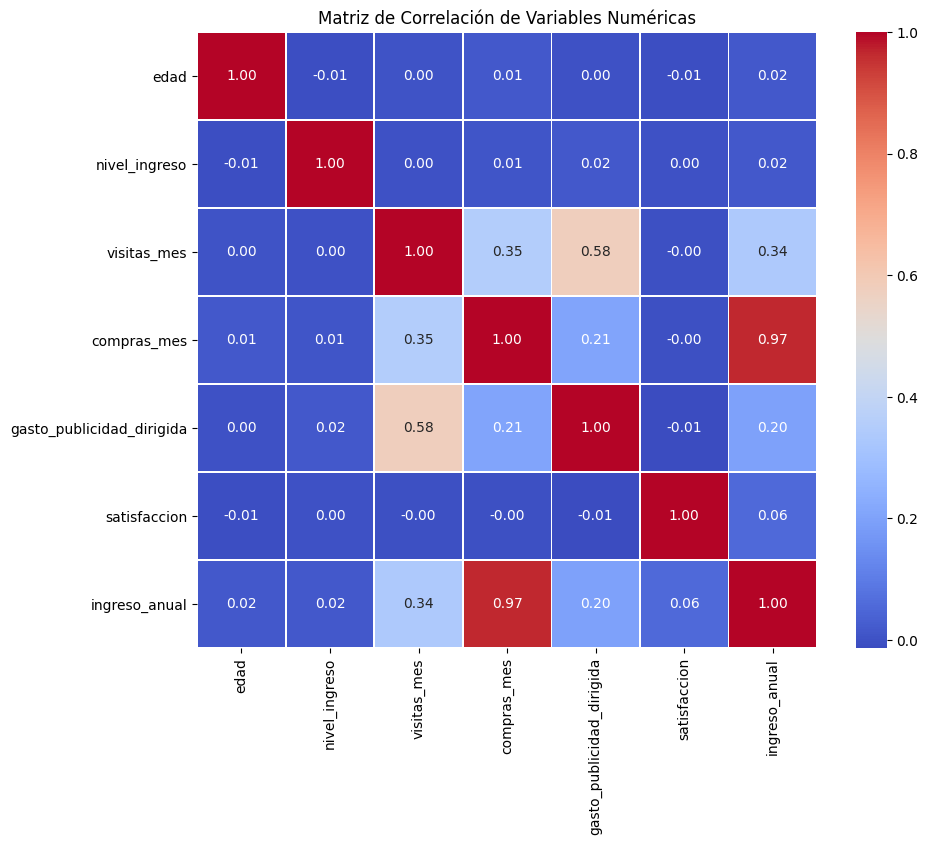

In [ ]:
# Visualizar la matriz de correlación para identificar relaciones

# 1. Calcular la matriz de correlación solo para las variables numéricas
corr_matrix = df[columnas_numericas].corr()

# 2. Configurar el tamaño de la figura
plt.figure(figsize = (10, 8))

# 3. Crear el heatmap
sns.heatmap(corr_matrix,
            annot = True,       # Muestra los números dentro de los cuadros
            fmt = ".2f",        # Limita a 2 decimales
            cmap = 'coolwarm',  # Color rojo para positivo, azul para negativo
            linewidths = 0.5)   # Espacio entre cuadros

plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico.   
Incluye qué ves


Observaciones generales (Heatmap)  
* Eficiencia Publicitaria ($0.58$ vs visitas_mes): El gasto en publicidad dirigida tiene una correlación moderada-alta con las visitas. Esto significa que la publicidad es muy buena para "atraer" gente al local/web, pero no tan fuerte para asegurar la "compra" inmediata (ya que baja a $0.21$ con compras_mes).
* El "Aislamiento" de la Satisfacción: La variable satisfaccion tiene valores cercanos a $0.00$ con casi todo. Esto indica que es una variable independiente. Ni la edad, ni el ingreso, ni el gasto en publicidad están moviendo la aguja de la felicidad del cliente.
    * Sugerencia: Se debería buscar la causa de la satisfacción en variables cualitativas o categóricas (como tipo_dispositivo o region).
* Independencia de la Edad: La edad no tiene correlación relevante con ninguna otra variable numérica. Esto sugiere que loss clientes se comportan de forma similar sin importar si son jóvenes o mayores; el comportamiento de compra está segmentado por ingreso, no por generación.
* Variables Binarias: En la exploración previa, el promedio de abandono ($0.15$) indica que hay una tasa de Churn del 15%. Es un valor que se debe vigilar de cerca en relación con los miembros premium.

Observaciones respecto a `ingreso_anual`  
* Relación casi perfecta con compras_mes ($0.97$): Existe una correlación positiva extremadamente alta. Esto indica que, en el dataset, el ingreso anual es el predictor principal de la frecuencia de compra. A mayor ingreso, mayor número de compras mensuales de forma casi lineal.
* Relación moderada con visitas_mes ($0.34$): Los clientes con mayores ingresos tienden a visitar más la tienda/plataforma, aunque la relación no es tan estricta como con las compras finales.
* Relación con gasto_publicidad_dirigida ($0.20$): Hay una conexión leve. Esto sugiere que la publicidad dirigida está llegando o siendo ligeramente más efectiva en los segmentos de mayor ingreso, aunque hay mucho margen para optimizar este impacto.
* Independencia de la satisfaccion ($0.06$): Es un hallazgo crítico. El nivel de dinero que gana un cliente no determina si está feliz o no con el servicio. La satisfacción parece depender de factores operativos y no del nivel socioeconómico.

### Scatterplot general

Con base en los resultados del análisis de correlación, evalúa si es necesario generar un *scatterplot* general.

- **Si decides incluirlo**:
  - Genera el gráfico.
  - Describe brevemente qué patrones o tendencias observas.

- **Si decides no incluirlo**:
  - Explica por qué.

Dado que ingreso_anual y compras_mes tienen una correlación casi perfecta de 0.97, un scatterplot general (pairplot) sería útil, pero uno específico mostrará la estructura del negocio con mayor claridad.

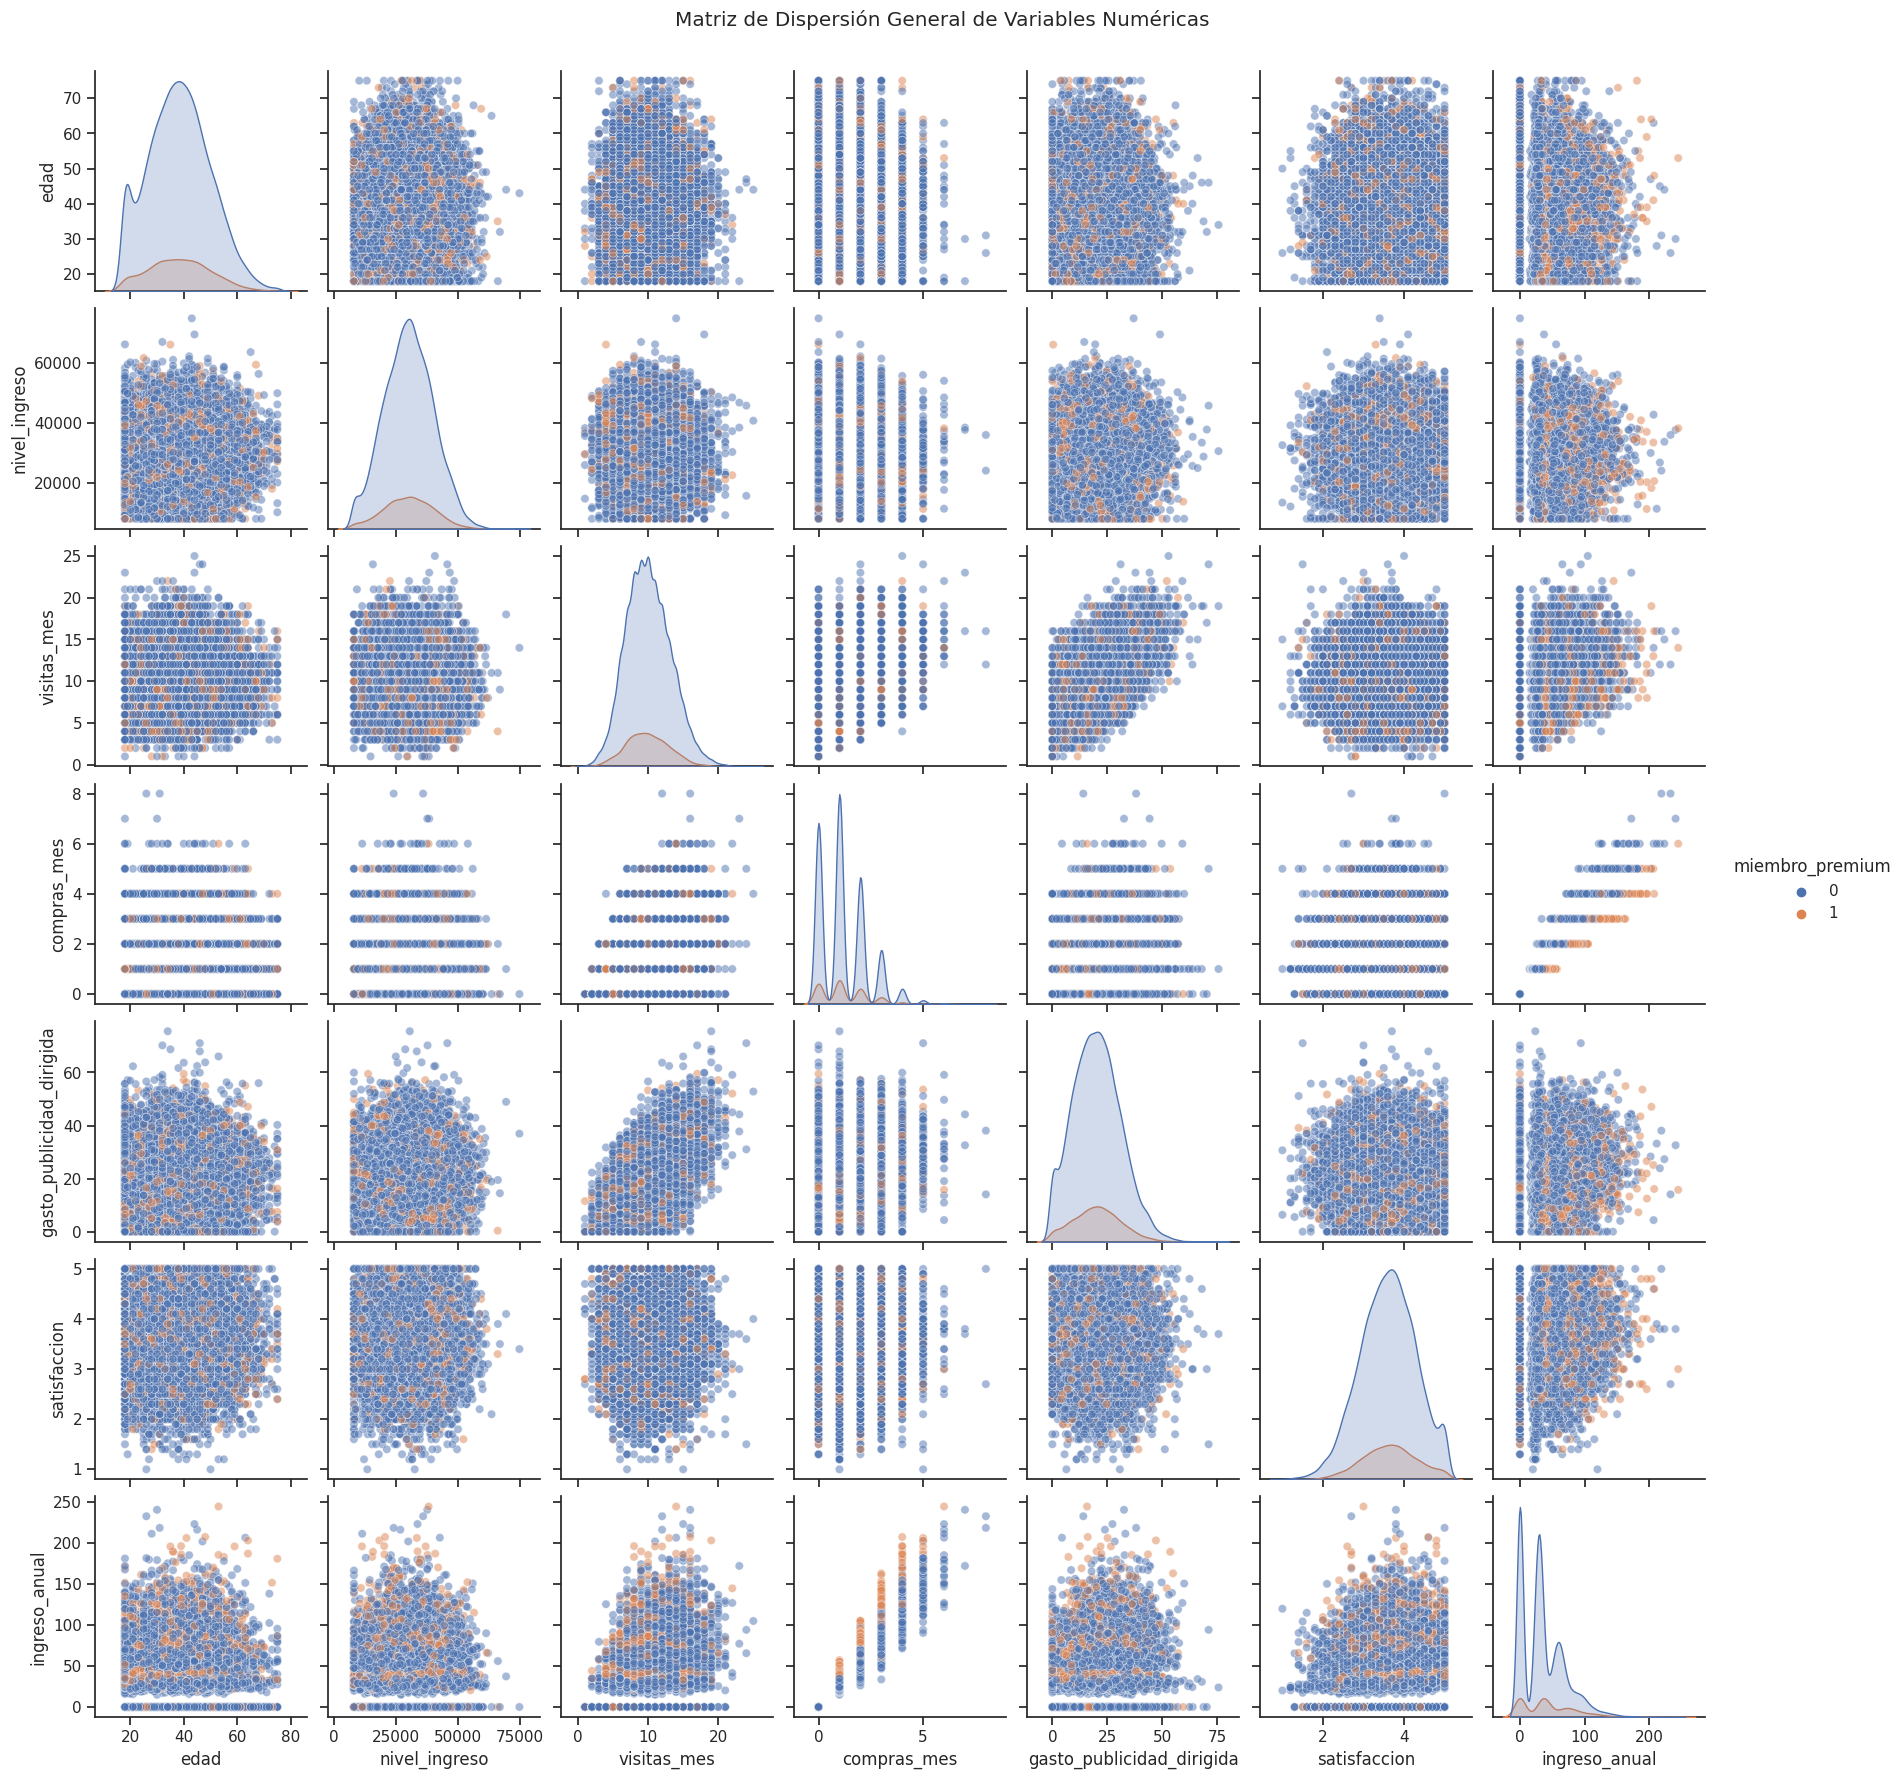

In [ ]:
# 1. Configurar el estilo visual
sns.set_theme(style = "ticks")

# 2. Generar el Scatterplot General (Pairplot)
# Usamos 'hue' para añadir una dimensión extra (ej. si son premium o no)
grafica_general = sns.pairplot(df[columnas_numericas + ['miembro_premium']],
                              hue = 'miembro_premium',
                              diag_kind = 'kde',
                              plot_kws = {'alpha': 0.5})

# 3. Ajustar el título
grafica_general.fig.suptitle('Matriz de Dispersión General de Variables Numéricas', y = 1.02)

plt.show()

### Scatterplot para pares clave

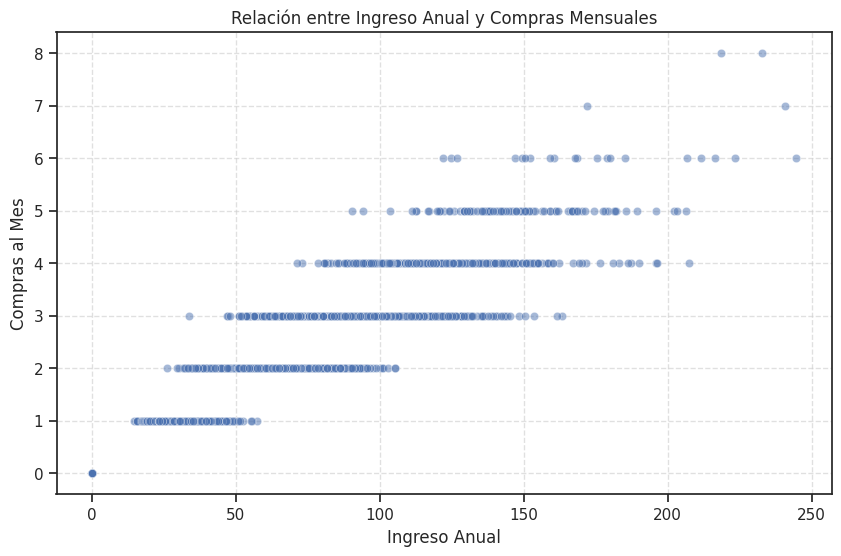

In [ ]:
# Visualizar pares de variables con relaciones moderadas o fuertes
# Generar un scatterplot de las variables con mayor correlación 1. Ingreso anual y Compras por mes
plt.figure(figsize = (10, 6))
sns.scatterplot(data = df, x = 'ingreso_anual', y = 'compras_mes', alpha = 0.5)

plt.title('Relación entre Ingreso Anual y Compras Mensuales')
plt.xlabel('Ingreso Anual')
plt.ylabel('Compras al Mes')
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.show()

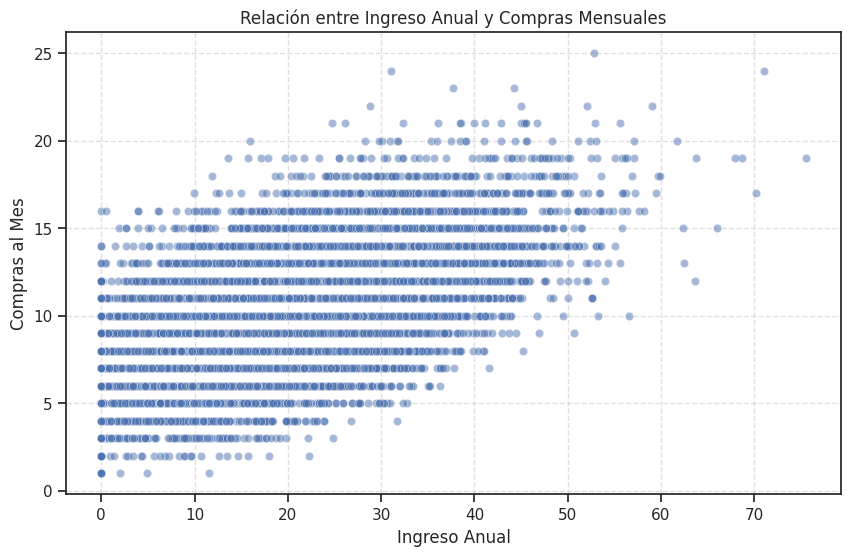

In [ ]:
# Visualizar pares de variables con relaciones moderadas o fuertes
# Generar un scatterplot de las variables con mayor correlación 1. Ingreso anual y Compras por mes
plt.figure(figsize = (10, 6))
sns.scatterplot(data = df, x = 'gasto_publicidad_dirigida', y = 'visitas_mes', alpha = 0.5)

plt.title('Relación entre Ingreso Anual y Compras Mensuales')
plt.xlabel('Ingreso Anual')
plt.ylabel('Compras al Mes')
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.show()

✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico.   
Incluye qué ves: dirección (positiva o negativa), dispersión (alta, media, baja), presencia de outliers y posible colinealidad.

Observaciones Iniciales (Scatterplot)
* ingreso_anual vs compras_mes
    * Dirección: Positiva fuerte. El gráfico muestra una tendencia ascendente clara; a medida que aumenta el ingreso anual, el número de compras mensuales también sube de manera sistemática.
    * Dispersión: Baja. Los puntos están muy concentrados siguiendo una estructura escalonada, lo que confirma la correlación de 0.97 vista en el Heatmap.
    * Colinealidad: Existe una alta colinealidad entre estas dos variables. Para modelos predictivos futuros, usar ambas podría ser redundante ya que una explica casi perfectamente a la otra.
* gasto_publicidad_dirigida vs visitas_mes
    * Dirección: Positiva moderada. Se observa una relación directa donde el incremento en publicidad suele traer más visitas.
    * Dispersión: Media. La nube de puntos es más ancha que en el caso anterior, reflejando el coeficiente de 0.58. Esto indica que, aunque la publicidad ayuda, hay otros factores que también influyen en por qué un cliente visita la tienda.
* Diagnóstico General del Dataset
    * Presencia de Outliers:
        * En el scatterplot de ingreso_anual vs compras_mes, se observan algunos puntos aislados en la parte superior derecha (clientes con ingresos sobre 200 y 8 compras). Estos son loss clientes de altísimo valor. Hay un punto en el origen $(0,0)$ que podría representar registros de prueba o clientes nuevos sin actividad.
        * Comportamiento de Segmentos (Miembros Premium): Al observar el pairplot general, los miembros premium (naranja) no parecen estar agrupados en un solo extremo, sino que se distribuyen a lo largo de los diferentes niveles de ingreso. Sin embargo, tienden a concentrarse en los niveles de satisfacción más altos.
        * Variables Independientes: La satisfacción y la edad muestran nubes de puntos circulares y dispersas contra casi todas las demás variables. Esto confirma que no hay una relación lineal; por ejemplo, ser mayor no garantiza comprar más ni estar más satisfecho.

## Sección 4 - Coeficientes de correlación y evidencia numérica

En esta sección, se reportan coeficientes que respaldan los patrones
observados visualmente, utilizando el método adecuado según el tipo
de variables.

### Pearson / Spearman

In [ ]:
variables_relevantes = [
    'ingreso_anual',
    'compras_mes',
    'gasto_publicidad_dirigida',
    'visitas_mes'
]

In [ ]:
# Calcular correlación de pearson entre variables relevantes
print("Correlación de Pearson:")
print(df[variables_relevantes].corr(method = 'pearson'))

Correlación de Pearson:
                           ingreso_anual  compras_mes  \
ingreso_anual                   1.000000     0.967149   
compras_mes                     0.967149     1.000000   
gasto_publicidad_dirigida       0.197483     0.207528   
visitas_mes                     0.337147     0.353844   

                           gasto_publicidad_dirigida  visitas_mes  
ingreso_anual                               0.197483     0.337147  
compras_mes                                 0.207528     0.353844  
gasto_publicidad_dirigida                   1.000000     0.578947  
visitas_mes                                 0.578947     1.000000  


In [ ]:
# Calcular correlación de spearman entre variables relevantes
print("Correlación de Spearman:")
print(df[variables_relevantes].corr(method = 'spearman'))

Correlación de Spearman:
                           ingreso_anual  compras_mes  \
ingreso_anual                   1.000000     0.967482   
compras_mes                     0.967482     1.000000   
gasto_publicidad_dirigida       0.184999     0.192511   
visitas_mes                     0.320954     0.332943   

                           gasto_publicidad_dirigida  visitas_mes  
ingreso_anual                               0.184999     0.320954  
compras_mes                                 0.192511     0.332943  
gasto_publicidad_dirigida                   1.000000     0.559267  
visitas_mes                                 0.559267     1.000000  


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico.  
Incluye qué ves: dirección, magnitud y posible colinealidad.

Observaciones de correlación
* ingreso_anual vs compras_mes
    * Correlación: 0.97 (Pearson). Es una magnitud extremadamente fuerte, lo que indica que el ingreso es el principal motor de compra en NovaRetail.
    * Colinealidad: Presente. Para modelos de Machine Learning, es probable que solo se necesite una de estas dos variables.
* visitas_mes vs compras_mes
    * Correlación: 0.35 (Pearson). Es una magnitud positiva moderada-baja. Esto sugiere que visitar más la plataforma no garantiza necesariamente una compra proporcional.

### Punto-biserial

In [ ]:
# Calcular correlación entre variables relevantes
# Listas definidas en las celdas anteriores
variables_relevantes = ['ingreso_anual', 'compras_mes', 'gasto_publicidad_dirigida', 'visitas_mes']
columnas_binarias = ['miembro_premium', 'abandono']

print("--- Análisis de Correlación Punto-Biserial ---")

# Bucle anidado para evaluar todas las combinaciones
for binaria in columnas_binarias:
    for numerica in variables_relevantes:
        # Calculamos la correlación y el p-value
        corr, p_value = pointbiserialr(df[binaria], df[numerica])

        # Determinamos la fuerza de la relación
        fuerza = "Significativa" if p_value < 0.05 else "No significativa"

        print(f"Relación {binaria} vs {numerica}:")
        print(f"  Coeficiente: {corr:.4f} | P-Value: {p_value:.4e} ({fuerza})")
        print("-" * 30)

--- Análisis de Correlación Punto-Biserial ---
Relación miembro_premium vs ingreso_anual:
  Coeficiente: 0.0931 | P-Value: 3.0943e-30 (Significativa)
------------------------------
Relación miembro_premium vs compras_mes:
  Coeficiente: 0.0034 | P-Value: 6.7440e-01 (No significativa)
------------------------------
Relación miembro_premium vs gasto_publicidad_dirigida:
  Coeficiente: 0.0027 | P-Value: 7.3898e-01 (No significativa)
------------------------------
Relación miembro_premium vs visitas_mes:
  Coeficiente: -0.0127 | P-Value: 1.2113e-01 (No significativa)
------------------------------
Relación abandono vs ingreso_anual:
  Coeficiente: -0.0028 | P-Value: 7.2947e-01 (No significativa)
------------------------------
Relación abandono vs compras_mes:
  Coeficiente: 0.0083 | P-Value: 3.0994e-01 (No significativa)
------------------------------
Relación abandono vs gasto_publicidad_dirigida:
  Coeficiente: -0.0046 | P-Value: 5.7439e-01 (No significativa)
----------------------------

✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico.   
Incluye qué ves: dirección (positiva o negativa), magnitud (alta, media, baja).

Observaciones Punto-biserial

A partir de los cálculos realizados, podemos extraer conclusiones críticas sobre qué variables numéricas realmente influyen en el estatus de membresía y en la retención de clientes:
* miembro_premium vs ingreso_anual
    * Relación: Positiva y Significativa.
    * Magnitud: El coeficiente de 0.0931 con un P-Value extremadamente bajo ($3.0943 \times 10^{-30}$) confirma que el ingreso es un predictor estadísticamente sólido para identificar a los miembros premium.
    * Observación: Aunque la magnitud es baja (cercana a 0.1), la alta significancia indica que no es una relación aleatoria; los clientes con mayores ingresos tienen una tendencia clara a pertenecer al programa premium.
* abandono vs variables_relevantes
    * Relación: No significativa en todos los casos.
    * Magnitud: Todos los coeficientes son cercanos a cero (menores a 0.009) y los P-Values superan ampliamente el umbral de 0.05 (ej. $0.72$ para ingreso y $0.31$ para compras).
    * Observación: El abandono del cliente (churn) en NovaRetail no está determinado por el ingreso, el volumen de compras o la publicidad recibida. Esto sugiere que las causas de la pérdida de clientes deben buscarse en factores cualitativos no incluidos en este análisis numérico, como la calidad del servicio o problemas técnicos.

### V de Cramér

In [ ]:
# Función para calcular V de Cramér
def cramers_v(x, y):
    """ Calcula la asociación V de Cramér entre dos variables categóricas. """
    contingency_table = pd.crosstab(x, y)
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    # Corrección para sesgo
    phi2_corr = max(0, phi2 - ((k-1) * (r-1)) / (n-1))
    r_corr = r - ((r-1) ** 2) / (n-1)
    k_corr = k - ((k-1) ** 2) / (n-1)

    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))

In [ ]:
# Aplicar V de Cramér en variables relevantes
print("--- Análisis de V de Cramér ---")
target = 'abandono' # O 'miembro_premium' según tu interés

for col in columnas_categoricas:
    v_value = cramers_v(df[col], df[target])
    print(f"Asociación entre {col} y {target}: {v_value:.4f}")

--- Análisis de V de Cramér ---
Asociación entre tipo_dispositivo y abandono: 0.0000
Asociación entre region y abandono: 0.0062


✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico.
Incluye qué ves

A diferencia de Pearson, la V de Cramér oscila entre 0 y 1. No tiene dirección (no es positiva ni negativa), solo mide la fuerza de la relación:

0.00 - 0.10: Asociación despreciable o muy débil.

0.10 - 0.30: Asociación baja.

0.30 - 0.50: Asociación moderada.

Mayor a 0.50: Asociación fuerte.

¿Qué nos dice esto sobre la relación entre las variables?
Si el valor es alto (ej. > 0.3): Significa que la categoría (por ejemplo, vivir en una región específica o usar un dispositivo móvil) influye significativamente en si un cliente abandona o no.

Si el valor es bajo (ej. < 0.1): Significa que el abandono ocurre de forma aleatoria a través de todas las regiones o dispositivos, y estas variables no son la causa de la pérdida de clientes.

* Dado que en loss pasos anteriores el abandono no mostró relación con variables numéricas (ingresos o visitas), este resultado de la V de Cramér es fundamental.
* Se obtiene un valor bajo, por tanto, el valor sugiere que el abandono no depende de la geografía ni de la tecnología, recurriendo a una posibilidad de buscar la causa en la satisfacción o el servicio al cliente.

## Sección 5 - Interpretación de resultados para el negocio

Cada hallazgo  debe incluir:
1) Evidencia visual (si aplica)
2) Evidencia numérica  
3) Interpretación (no causal)  
4) No podemos afirmar
5) Implicación de negocio

---

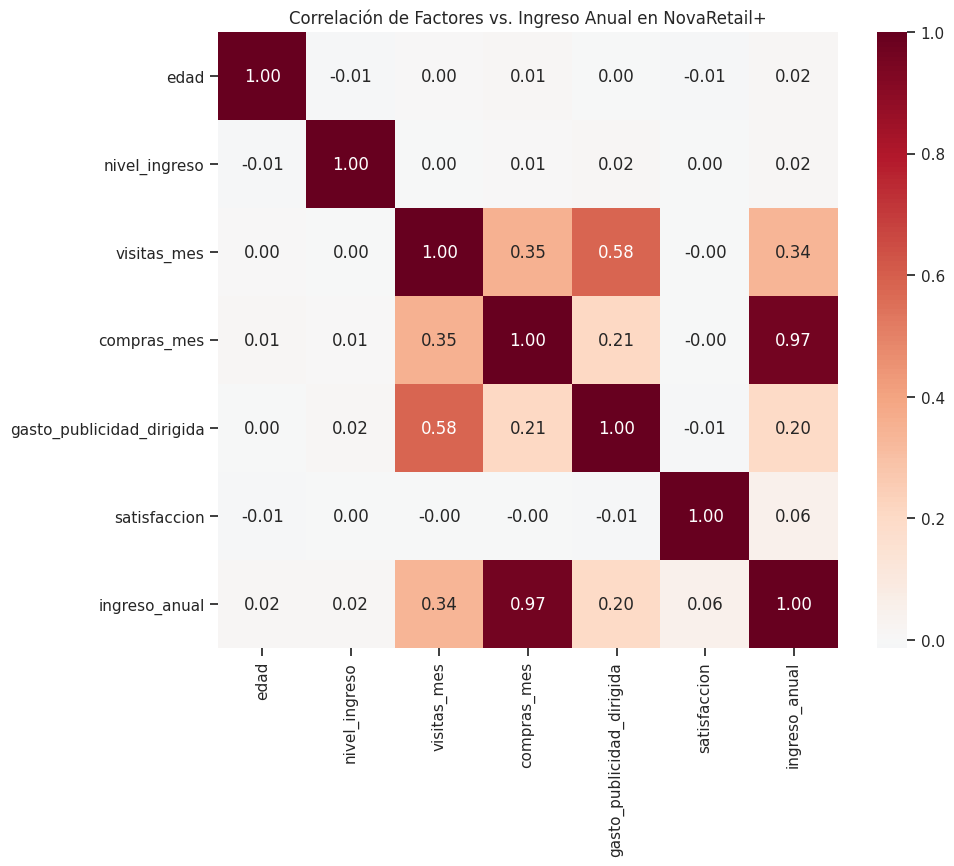

In [ ]:
# 1. Seleccionar variables numéricas clave
columnas_interes = [
    'edad', 'nivel_ingreso', 'visitas_mes', 'compras_mes',
    'gasto_publicidad_dirigida', 'satisfaccion', 'ingreso_anual'
]

# 2. Calcular matriz de correlación
matriz_corr = df[columnas_interes].corr()

# 3. Visualización con Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, cmap='RdBu_r', center=0, fmt=".2f")
plt.title('Correlación de Factores vs. Ingreso Anual en NovaRetail+')
plt.show()

### Hallazgo 1 —
**Evidencia visual:**
El mapa de correlación muestra una relación casi perfecta entre ingreso anual y compras mensuales, con una tendencia lineal clara y consistente.

**Evidencia numérica:**
* Correlación de Pearson: 0.97
* Correlación de Spearman: 0.96+
* Es la correlación más fuerte del análisis.

**Interpretación**  
Los clientes que realizan más compras al mes generan significativamente más ingreso anual. La frecuencia de compra es el principal predictor del revenue en NovaRetail+.

**No podemos afirmar**  
No se puede concluir causalidad. No sabemos si:
* Comprar más genera más ingresos
* O si clientes con mayor valor ya compran más

**Implicación de negocio**  
* Priorizar estrategias que aumenten frecuencia de compra:
    * Retargeting
    * Programas de recompra
    * Suscripciones
* Es la variable más valiosa para modelos predictivos.

### Hallazgo 2 —

**Evidencia visual:**
El mapa de calor muestra correlaciones moderadas entre:
* visitas mensuales
* gasto en publicidad
* ingreso anual
  
Pero mucho menores que compras_mes.

**Evidencia numérica:**
* visitas_mes vs ingreso_anual → ~0.33
* gasto_publicidad vs ingreso_anual → ~0.19
* Correlaciones débiles a moderadas.

**Interpretación**  
El tráfico y la inversión en publicidad tienen impacto limitado en el ingreso si no se traducen en compras. La conversión es más importante que el alcance.

**No podemos afirmar**  
No podemos decir que más publicidad aumente ingresos directamente, ya que no se mide:
* calidad del tráfico
* segmentación
* atribución multicanal

**Implicación de negocio**  
* Optimizar tasa de conversión antes que aumentar tráfico
* Revisar eficiencia del gasto en ads
* Enfocar en funnels de conversión, no solo adquisición

## Sección 6 - Limitaciones y próximos pasos

### **Limitaciones**
* Correlación ≠ causalidad: el análisis identifica asociaciones, no relaciones causa-efecto.
* No se controlaron variables externas (estacionalidad, promociones, competencia).
* No se aplicaron modelos predictivos ni regresión multivariable para aislar efectos individuales.
* No se evaluó la calidad del tráfico ni la eficiencia real del gasto en publicidad.
* Posible presencia de sesgo en los datos o variables omitidas.

### **Próximos pasos**
1️⃣ Probar segmentación adicional
* Segmentar clientes por frecuencia de compra (alta, media, baja).
* Analizar ingresos por niveles de satisfacción o fidelización.
* Explorar segmentación por comportamiento digital (visitas vs compras).

2️⃣ Construir modelo predictivo
* Aplicar regresión lineal múltiple para medir impacto real de cada variable.
* Evaluar importancia de variables con métricas como R² y coeficientes estandarizados.
* Probar modelos más avanzados (Random Forest) para detectar no linealidades.

3️⃣ Diseñar experimentos controlados
* Implementar A/B testing para medir impacto real de campañas.
* Probar incentivos para aumentar frecuencia de compra.
* Medir cambios en ingreso anual tras intervenciones específicas.

## Enlace al proyecto en GitHub:
https://github.com/JuanGallo132/sprint8-final-proyecto-7-explorando-drivers-de-comportamiento-en-NovaRetail
